1）假设我们希望使用一棵决策树拟合一个sin波。为了让示例变得有趣，我们还将使用NumPy的随机数生成器在数据点中添加一些噪声：

In [1]:
import numpy as np
rng = np.random.RandomState(42)

2）然后，创建100个在0和5之间随机间隔的x值，并计算对应的sin值：

In [2]:
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()

3）接着，（使用y\[: : 2]）向y中的所有其他数据点添加噪声，缩放比例为0.5，这样就不会引入太多抖动：

In [3]:
y[::2] += 0.5 * (0.5 - rng.rand(50))

4）我们可以再创建一棵和之前的树一样的回归树。

一个小的区别是基尼系数和熵的拆分标准不适用于回归任务。但scikit-learn提供了两种不同的拆分标准：
- mse（也称为方差缩减）：这个标准计算实际值和预测值之间的均方误差（MeanSquared Error，MSE），并拆分产生最小均方误差的节点。
- mae：这个标准计算实际值和预测值之间的平均绝对误差（Mean AbsoluteError，MAE），并拆分产生最小平均绝对误差的节点。

5）根据MSE标准，我们将构建两棵树。让我们先构建一棵深度为2的树：

In [4]:
from sklearn import tree
regr1 = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
regr1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

6）接下来，我们将构建一棵最大深度为5的决策树：

In [5]:
regr2 = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
regr2.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=42)

7）为此，我们创建一个测试集，在从0到5的整个范围内对x值密集采样：

In [6]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

8）用predict方法可以获得预测的y值：

In [7]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

9）如果把这些内容都绘制在一个图中，我们将看到决策树的区别：

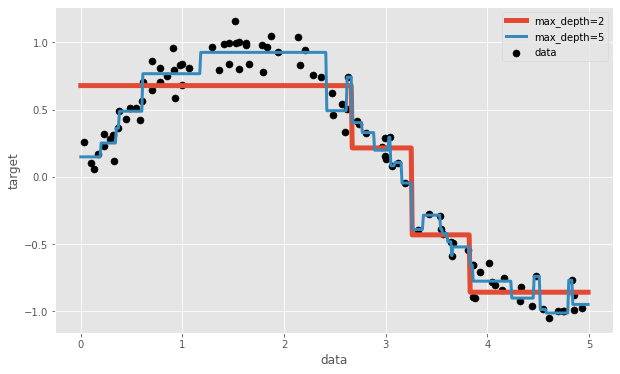

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='k', s=50, label='data')
plt.plot(X_test, y_1, label="max_depth=2", linewidth=5)
plt.plot(X_test, y_2, label="max_depth=5", linewidth=3)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()